In [1]:
import pandas as pd

df = pd.read_csv("data/tiktokAppReviews/tiktok_app_reviews.csv")

C:\Users\niksn\AppData\Local\Temp\ipykernel_41588\2717834983.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/tiktokAppReviews/tiktok_app_reviews.csv")


In [11]:
df.describe()

,upvotes
count,3.646476e+06
mean,6.874999e-01
std,3.800550e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.884200e+04


# **Part A : EDA**

In [12]:
!pip install nltk
import nltk
nltk.download('punkt_tab')



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\niksn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\niksn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\niksn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# A1. Basic Dataset Overview

In [14]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (3646476, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646476 entries, 0 to 3646475
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   review_text  object
 2   upvotes      int64 
 3   app_version  object
 4   posted_date  object
dtypes: int64(1), object(4)
memory usage: 139.1+ MB
None

First 5 rows:
                                           review_id  \
0  gp:AOqpTOGSsGv5rOA79ttW2LE0FeMYvkdUuXRMTfbyMk0...   
1  gp:AOqpTOEDQ9__FJihY_0V4iwqy4P2OK8tGVR1tFBixYb...   
2  gp:AOqpTOEGEfr8TL0iKTlpbTDeM8P7HywlMmP9CkHMoaT...   
3  gp:AOqpTOGZBDl9dpghmb43Mx1tnlWCOjNXyuVn5Mxf49c...   
4  gp:AOqpTOFioH3wud_JnC4aPCG4p7s5DEEN2yZAWNXdRJj...   

                                         review_text  upvotes app_version  \
0  It is an excellent solution to finding videos ...      402      21.2.5   
1  Great app works really well so many features s...       67      21.2.5   
2  I down loaded app but didnt

# A2. Check for missing values


In [15]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
review_id           0
review_text       163
upvotes             0
app_version    993269
posted_date         0
dtype: int64


# A3. Convert posted_date to datetime


In [16]:
if df['posted_date'].dtype != 'datetime64[ns]':
    df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

print("\nDate Range:")
print(f"Earliest review: {df['posted_date'].min()}")
print(f"Latest review: {df['posted_date'].max()}")
print(f"Time span: {(df['posted_date'].max() - df['posted_date'].min()).days} days")


Date Range:
Earliest review: 2015-07-11 07:37:08
Latest review: 2021-09-22 15:04:24
Time span: 2265 days


# A4. Summary statistics


In [17]:
print("\nNumeric Columns Summary Statistics:")
print(df[['upvotes']].describe())


Numeric Columns Summary Statistics:
            upvotes
count  3.646476e+06
mean   6.874999e-01
std    3.800550e+01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    2.884200e+04


# 5. App Version Analysis

In [18]:
print("\nApp Version Distribution:")
version_counts = df['app_version'].value_counts().reset_index()
version_counts.columns = ['app_version', 'count']
print(version_counts.head(10))  # Top 10 versions


App Version Distribution:
  app_version  count
0      17.9.5  55886
1      16.6.4  52416
2      13.9.3  49169
3      14.7.5  48582
4     18.2.41  40400
5       9.9.0  38734
6      14.0.5  35261
7      18.5.6  33310
8     16.6.43  32734
9      18.1.3  32559


# 6. Time Series Analysis
### Add month-year column for grouping

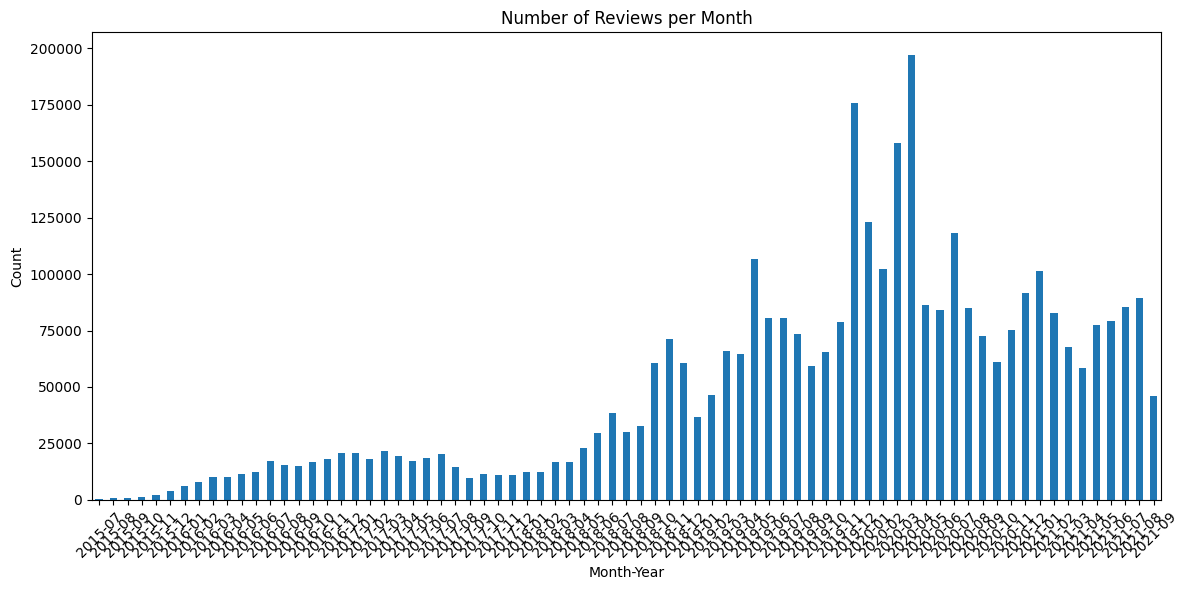

In [19]:
df['month_year'] = df['posted_date'].dt.to_period('M')

# Reviews over time
monthly_reviews = df.groupby('month_year').size()
plt.figure(figsize=(12, 6))
monthly_reviews.plot(kind='bar')
plt.title('Number of Reviews per Month')
plt.ylabel('Count')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('reviews_over_time.png')

# A7. Upvotes Analysis


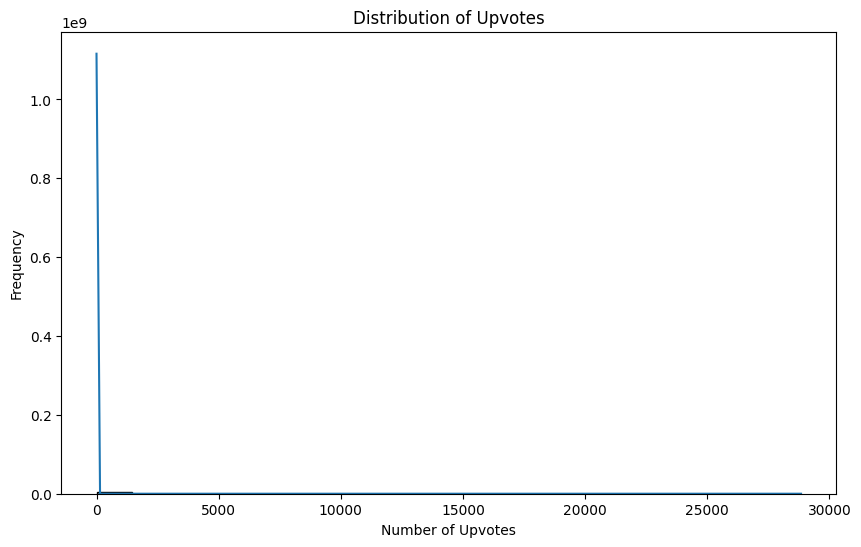

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['upvotes'], bins=20, kde=True, log_scale="log" )
plt.title('Distribution of Upvotes')
plt.xlabel('Number of Upvotes')
plt.ylabel('Frequency')
plt.savefig('upvotes_distribution.png')

# A8. Review Text Length Analysis


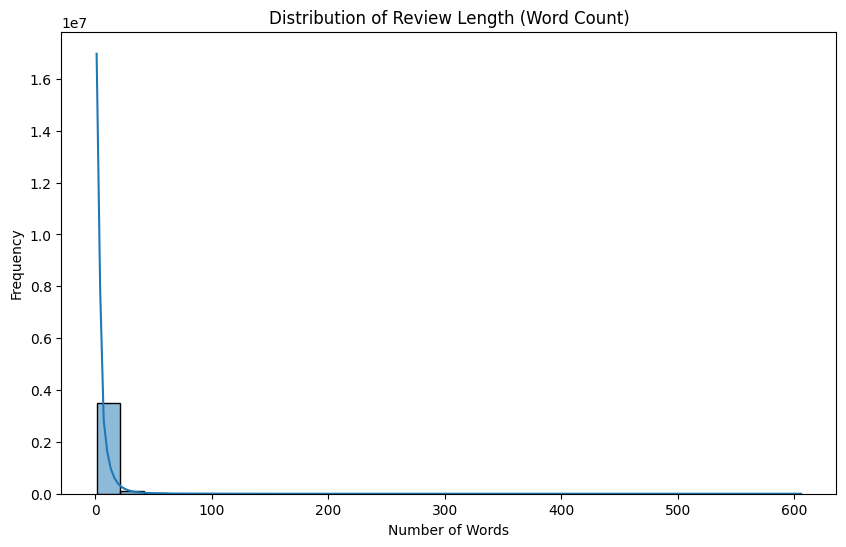

In [21]:
df['review_length'] = df['review_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Length (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.savefig('review_length_distribution.png')

# A9. Review Length vs Upvotes

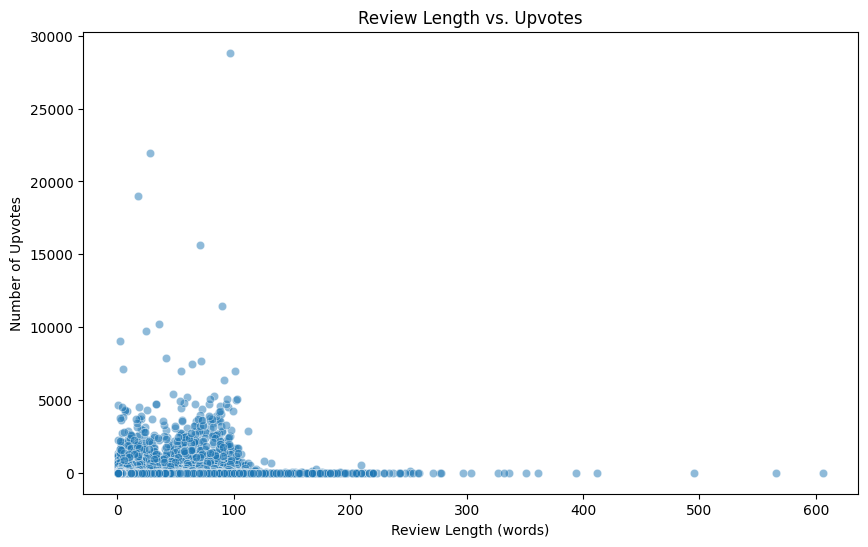

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='upvotes', data=df, alpha=0.5)
plt.title('Review Length vs. Upvotes')
plt.xlabel('Review Length (words)')
plt.ylabel('Number of Upvotes')
plt.savefig('review_length_vs_upvotes.png')

# A10. Version Analysis Over Time

<Figure size 1200x600 with 0 Axes>

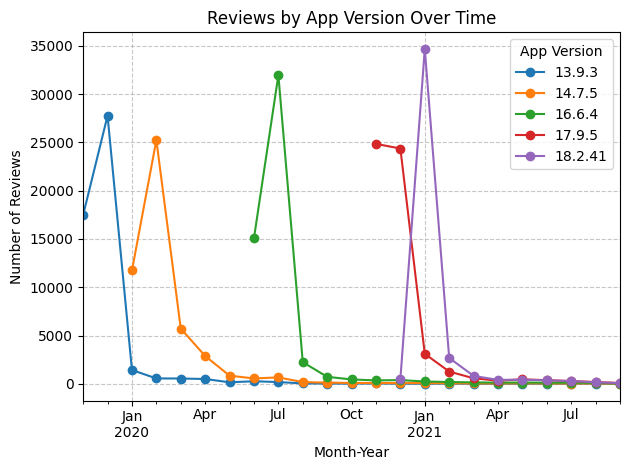

In [23]:
# Get the most frequent versions
top_versions = df['app_version'].value_counts().head(5).index.tolist()

# Filter data to include only top versions
df_top_versions = df[df['app_version'].isin(top_versions)]

# Count reviews by version and month
version_over_time = df_top_versions.groupby(['month_year', 'app_version']).size().unstack()

plt.figure(figsize=(12, 6))
version_over_time.plot(kind='line', marker='o')
plt.title('Reviews by App Version Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.legend(title='App Version')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('version_over_time.png')

# A11. Common Words by Version

In [26]:
def preprocess_text(text):
    if not isinstance(text, str):
        return []

    # Lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    return tokens

# Configure the sample size per app version
SAMPLES_PER_VERSION = 5000

# Group by app_version and sample evenly
sampled_reviews = []
for version, group in df.groupby('app_version'):
    # Take min(SAMPLES_PER_VERSION, group size) samples from each version
    version_sample = group.sample(min(SAMPLES_PER_VERSION, len(group)), random_state=42)
    sampled_reviews.append(version_sample)

# Combine all samples into a new dataframe
sampled_df = pd.concat(sampled_reviews, ignore_index=True)

# Process reviews on the sampled dataframe
sampled_df['tokens'] = sampled_df['review_text'].apply(preprocess_text)

# Create a function to get top words by version
def get_top_words_by_version(df, version, n=15):
    version_reviews = df[df['app_version'] == version]
    all_words = []
    for tokens in version_reviews['tokens']:
        all_words.extend(tokens)

    return Counter(all_words).most_common(n)

# Get top 5 versions by frequency in the original dataset
top_5_versions = df['app_version'].value_counts().head(5).index.tolist()

print(f"\nMost Common Words by Top App Versions (using {SAMPLES_PER_VERSION} reviews per version):")
for version in top_5_versions:
    print(f"\nVersion {version}:")
    sample_count = len(sampled_df[sampled_df['app_version'] == version])
    print(f"  Sample size: {sample_count} reviews")
    top_words = get_top_words_by_version(sampled_df, version)
    for word, count in top_words:
        print(f"  {word}: {count}")



Most Common Words by Top App Versions (using 5000 reviews per version):

Version 17.9.5:
  Sample size: 5000 reviews
  app: 1292
  love: 779
  good: 746
  tiktok: 370
  like: 338
  nice: 312
  best: 311
  fun: 290
  tik: 261
  tok: 241
  video: 222
  great: 222
  amazing: 222
  account: 219
  videos: 204

Version 16.6.4:
  Sample size: 5000 reviews
  app: 1547
  love: 867
  good: 728
  best: 406
  nice: 406
  fun: 367
  tiktok: 352
  tik: 305
  tok: 305
  amazing: 288
  like: 278
  great: 218
  videos: 166
  ever: 159
  please: 154

Version 13.9.3:
  Sample size: 5000 reviews
  app: 1412
  good: 798
  love: 679
  nice: 575
  best: 353
  fun: 297
  amazing: 286
  tik: 269
  tok: 269
  like: 246
  tiktok: 245
  awesome: 207
  great: 183
  super: 178
  videos: 147

Version 14.7.5:
  Sample size: 5000 reviews
  app: 1154
  good: 733
  nice: 669
  love: 599
  best: 300
  fun: 257
  tiktok: 237
  tik: 231
  tok: 228
  like: 221
  amazing: 220
  great: 177
  super: 174
  awesome: 154
  video

# 12. Average Upvotes per Version

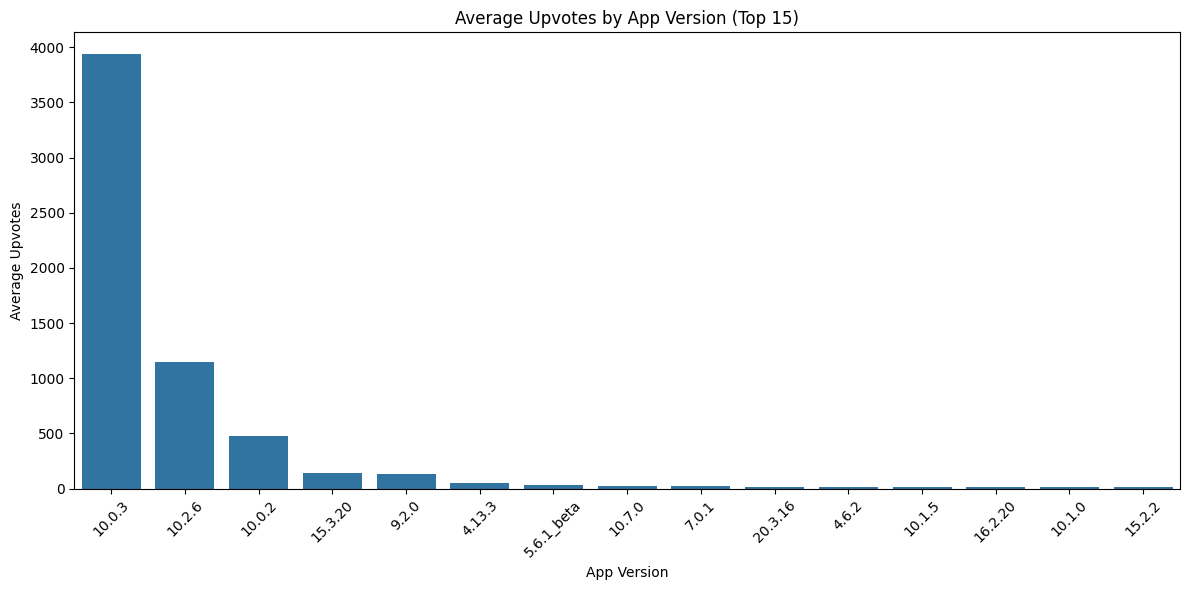

In [27]:

avg_upvotes = df.groupby('app_version')['upvotes'].mean().reset_index()
avg_upvotes = avg_upvotes.sort_values('upvotes', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='app_version', y='upvotes', data=avg_upvotes.head(15))
plt.title('Average Upvotes by App Version (Top 15)')
plt.xlabel('App Version')
plt.ylabel('Average Upvotes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_upvotes_by_version.png')

# A13. Correlation between variables

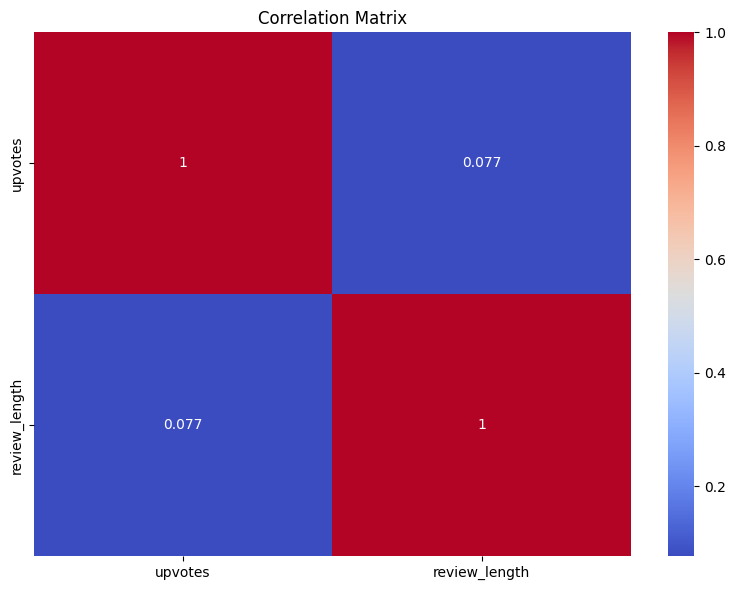

In [28]:
numeric_df = df[['upvotes', 'review_length']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

# 14. Version Progression Analysis


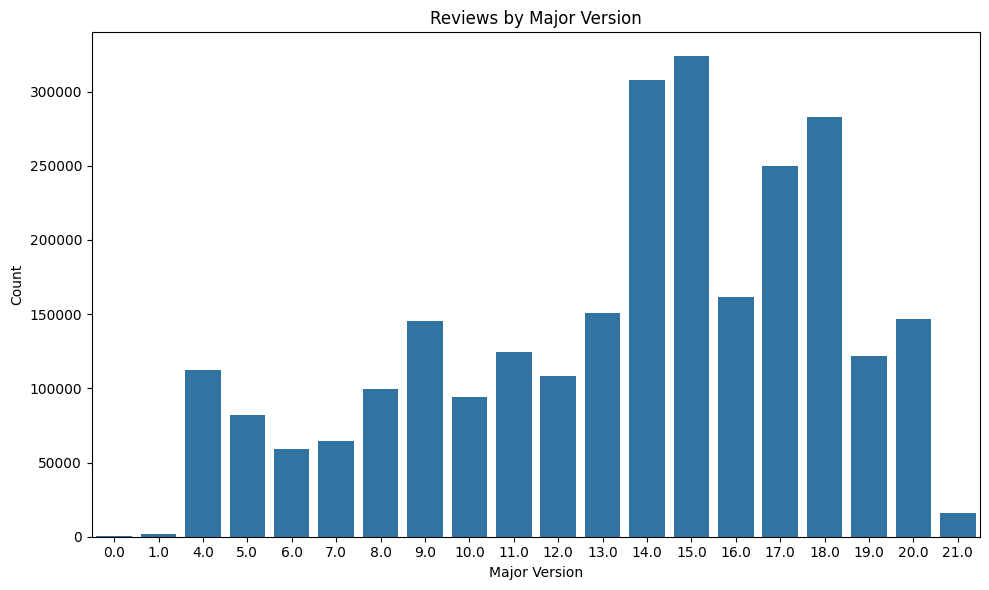

In [29]:
# Extract major.minor.patch version numbers if they follow standard versioning
def extract_version_components(version):
    try:
        if isinstance(version, str) and '.' in version:
            components = version.split('.')
            if len(components) >= 3:
                return (int(components[0]), int(components[1]), int(components[2]))
            elif len(components) == 2:
                return (int(components[0]), int(components[1]), 0)
    except:
        pass
    return None

df['version_components'] = df['app_version'].apply(extract_version_components)
df['major_version'] = df['version_components'].apply(lambda x: x[0] if x else None)
df['minor_version'] = df['version_components'].apply(lambda x: x[1] if x else None)

# Analyze reviews by major version
plt.figure(figsize=(10, 6))
sns.countplot(x='major_version', data=df[df['major_version'].notna()])
plt.title('Reviews by Major Version')
plt.xlabel('Major Version')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('reviews_by_major_version.png')

# Part B - APP SENTIMENTS

In [31]:
!pip install transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/75/b9/093543d741ddb7ccaeb655c8800968bd5cb42e26a51560287b00b4aa748b/transformers-4.50.0-py3-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub<1.0,>=0.26.0 from https://files.pythonhosted.org/packages/40/0c/37d380846a2e5c9a3c6a73d26ffbcfdcad5fc3eacf42fdf7cff56f2af634/huggingface_hub-0.29.3-py3-none-any.whl.metadata
  Obtaining dependency information for tokenizers<0.22,>=0.21 from https://files.pythonhosted.org/packages/e6/b6/072a8e053ae600dcc2ac0da81a23548e3b523301a442a6ca900e92ac35be/tokenizers-0.21.1-cp39-abi3-win_amd64.whl.metadata
  Obtaining dependency information for safetensors>=0.4.3 from https://files.pythonhosted.org/packages/69/e2/b011c38e5394c4c18fb5500778a55ec43ad6106126e74723ffaee246f56e/safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
    --------------------------------------- 0


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Analyzing these 10 most recent versions: ['21.2.5' '21.1.41' '21.2.3' '21.1.6' '20.8.4' '20.9.3' '21.3.1' '21.2.4'
 '21.3.2' '20.6.4']
Total sampled reviews: 958
Loading BERT model for sentiment analysis...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERT model loaded successfully
Processing batch 1/96
Processing batch 2/96
Processing batch 3/96
Processing batch 4/96
Processing batch 5/96
Processing batch 6/96
Processing batch 7/96
Processing batch 8/96
Processing batch 9/96
Processing batch 10/96
Processing batch 11/96
Processing batch 12/96
Processing batch 13/96
Processing batch 14/96
Processing batch 15/96
Processing batch 16/96
Processing batch 17/96
Processing batch 18/96
Processing batch 19/96
Processing batch 20/96
Processing batch 21/96
Processing batch 22/96
Processing batch 23/96
Processing batch 24/96
Processing batch 25/96
Processing batch 26/96
Processing batch 27/96
Processing batch 28/96
Processing batch 29/96
Processing batch 30/96
Processing batch 31/96
Processing batch 32/96
Processing batch 33/96
Processing batch 34/96
Processing batch 35/96
Processing batch 36/96
Processing batch 37/96
Processing batch 38/96
Processing batch 39/96
Processing batch 40/96
Processing batch 41/96
Processing batch 42/96
Processing b

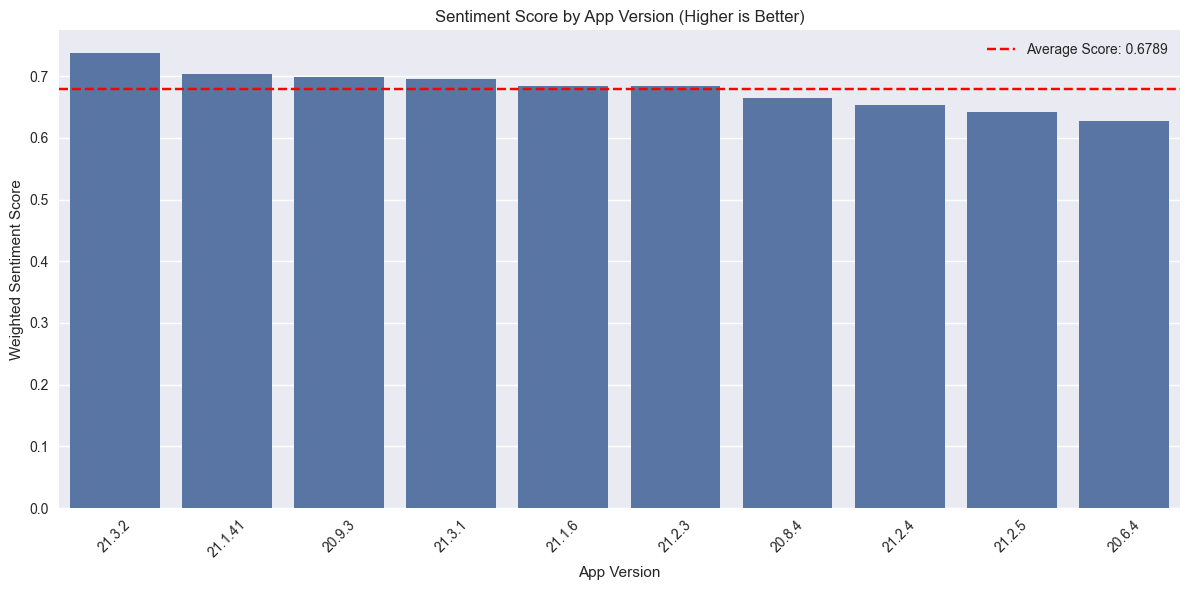

<Figure size 1200x600 with 0 Axes>

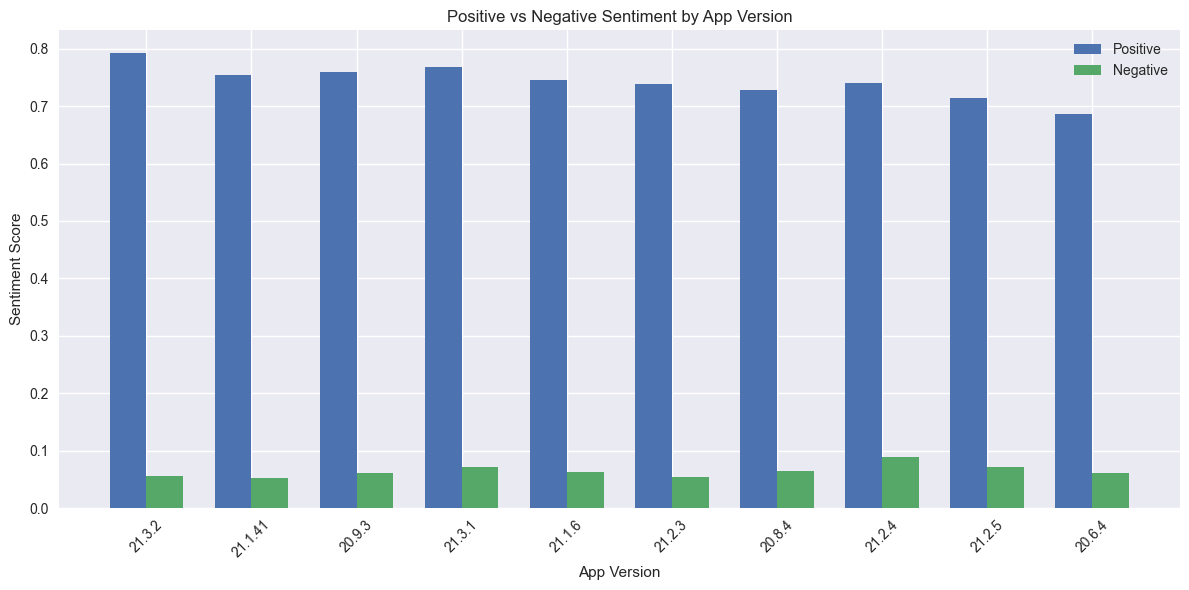

<Figure size 1200x800 with 0 Axes>

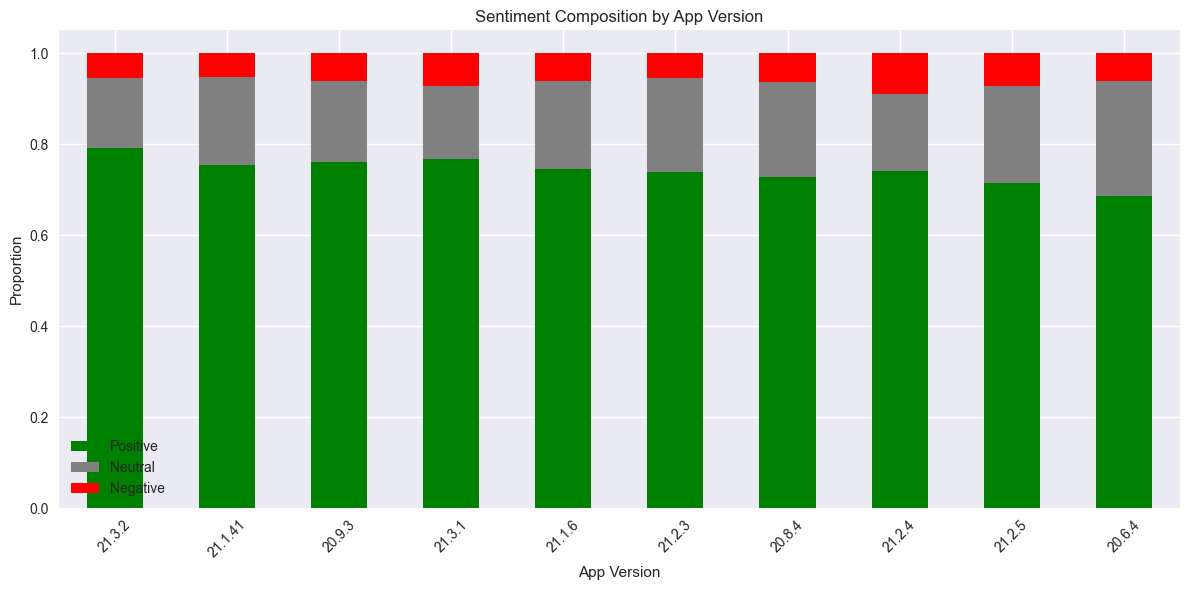

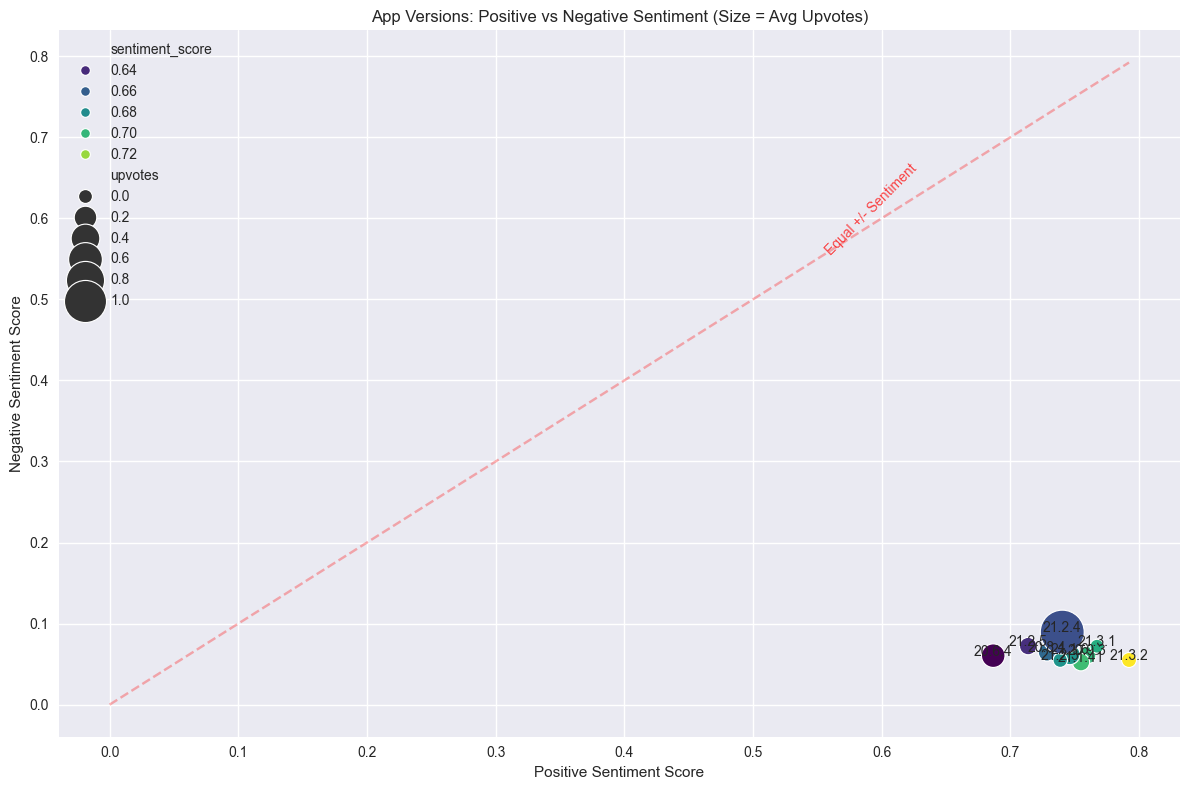

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import warnings
warnings.filterwarnings('ignore')

# Configuration parameters
REVIEWS_PER_VERSION = 100  # Configurable
NUM_VERSIONS = 10           # Top 10 recent versions
UPVOTE_WEIGHT = 0.3         # Configurable weight for upvotes

# 1. Load the dataset (assuming it's already loaded as df)
# df = pd.read_csv('tiktok_reviews.csv')

# Clean up NaN values in app_version
df = df.dropna(subset=['app_version'])  # Remove rows with NaN app versions

# Make sure posted_date is in datetime format
if df['posted_date'].dtype != 'datetime64[ns]':
    df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

# Drop rows where date conversion failed
df = df.dropna(subset=['posted_date'])

# Sort by date to get the most recent versions
recent_versions = df.sort_values('posted_date', ascending=False)['app_version'].unique()[:NUM_VERSIONS]
print(f"Analyzing these {NUM_VERSIONS} most recent versions: {recent_versions}")

# Sample REVIEWS_PER_VERSION reviews from each recent version
sampled_reviews = []
for version in recent_versions:
    version_reviews = df[df['app_version'] == version]
    # Take min to handle cases where we have fewer reviews than requested
    version_sample = version_reviews.sample(min(REVIEWS_PER_VERSION, len(version_reviews)), random_state=42)
    sampled_reviews.append(version_sample)

# Combine samples
sampled_df = pd.concat(sampled_reviews, ignore_index=True)
print(f"Total sampled reviews: {len(sampled_df)}")

# 2. Sentiment Analysis using BERT with proper error handling
print("Loading BERT model for sentiment analysis...")
try:
    # Using roberta-base for sentiment analysis (more robust than bertweet-base)
    model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    print("BERT model loaded successfully")
except Exception as e:
    print(f"Error loading BERT model: {e}")
    raise

# Function to get sentiment scores with robust error handling
def get_sentiment(text, max_length=128):  # Reduced max_length for efficiency
    if not isinstance(text, str) or not text.strip():
        return {"negative": 0.33, "neutral": 0.34, "positive": 0.33}  # Default for empty/invalid

    try:
        # Truncate long reviews to max_length tokens
        encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=max_length, padding=True)

        # Check if any dimension is empty
        if 0 in encoded_input['input_ids'].shape:
            return {"negative": 0.33, "neutral": 0.34, "positive": 0.33}

        with torch.no_grad():
            output = model(**encoded_input)

        scores = softmax(output.logits[0].detach().numpy())

        # Depending on the model, the order might be different
        # Check the model's label mapping
        return {
            "negative": float(scores[0]),
            "neutral": float(scores[1]),
            "positive": float(scores[2])
        }
    except Exception as e:
        print(f"Error in sentiment analysis: {e} for text: {text[:50]}...")
        return {"negative": 0.33, "neutral": 0.34, "positive": 0.33}  # Default for errors

# Process in smaller batches to avoid memory issues
batch_size = 10  # Reduced batch size
sampled_df['sentiment_scores'] = None

for i in range(0, len(sampled_df), batch_size):
    end_idx = min(i + batch_size, len(sampled_df))
    print(f"Processing batch {i//batch_size + 1}/{(len(sampled_df) + batch_size - 1)//batch_size}")
    batch = sampled_df.iloc[i:end_idx]

    # Process each review individually for better error handling
    batch_sentiments = []
    for text in batch['review_text']:
        sentiment = get_sentiment(str(text))
        batch_sentiments.append(sentiment)

    # Safely assign results back
    for j, sentiment in enumerate(batch_sentiments):
        if i + j < len(sampled_df):
            sampled_df.at[i + j, 'sentiment_scores'] = sentiment

# Extract sentiment scores into separate columns
sampled_df['negative_score'] = sampled_df['sentiment_scores'].apply(lambda x: x['negative'] if x else 0.33)
sampled_df['neutral_score'] = sampled_df['sentiment_scores'].apply(lambda x: x['neutral'] if x else 0.34)
sampled_df['positive_score'] = sampled_df['sentiment_scores'].apply(lambda x: x['positive'] if x else 0.33)

# Handle NaN in upvotes
sampled_df['upvotes'] = sampled_df['upvotes'].fillna(0)

# 3. Apply upvote weightage
# Normalize upvotes (0-1 scale using min-max scaling)
min_upvotes = sampled_df['upvotes'].min()
max_upvotes = sampled_df['upvotes'].max()
if max_upvotes > min_upvotes:  # Avoid division by zero
    sampled_df['normalized_upvotes'] = (sampled_df['upvotes'] - min_upvotes) / (max_upvotes - min_upvotes)
else:
    sampled_df['normalized_upvotes'] = 0

# Calculate weighted sentiment score
# Formula: (positive_score - negative_score) * (1 + UPVOTE_WEIGHT * normalized_upvotes)
sampled_df['sentiment_score'] = (sampled_df['positive_score'] - sampled_df['negative_score']) * \
                                (1 + UPVOTE_WEIGHT * sampled_df['normalized_upvotes'])

# 4. Calculate scores per version
version_scores = sampled_df.groupby('app_version').agg({
    'sentiment_score': 'mean',
    'positive_score': 'mean',
    'negative_score': 'mean',
    'neutral_score': 'mean',
    'upvotes': 'mean',
    'review_id': 'count'  # Count of reviews per version
}).reset_index()

version_scores = version_scores.rename(columns={'review_id': 'review_count'})
version_scores['pos_neg_ratio'] = version_scores.apply(
    lambda row: row['positive_score'] / row['negative_score'] if row['negative_score'] > 0 else
                row['positive_score'] if row['positive_score'] > 0 else 1,  # Avoid divide by zero
    axis=1
)

# Calculate the overall average score
avg_score = version_scores['sentiment_score'].mean()
print(f"Average sentiment score across versions: {avg_score:.4f}")

# Find the best version based on sentiment score
best_version = version_scores.loc[version_scores['sentiment_score'].idxmax()]
print(f"Best version: {best_version['app_version']} with score: {best_version['sentiment_score']:.4f}")

# 5. Plotting
# Set up the matplotlib style
plt.style.use('seaborn-v0_8')

# Plot 1: Sentiment scores by version
plt.figure(figsize=(12, 6))
sns.barplot(x='app_version', y='sentiment_score', data=version_scores,
            order=version_scores.sort_values('sentiment_score', ascending=False)['app_version'])
plt.axhline(y=avg_score, color='r', linestyle='--', label=f'Average Score: {avg_score:.4f}')
plt.title('Sentiment Score by App Version (Higher is Better)')
plt.xlabel('App Version')
plt.ylabel('Weighted Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('version_sentiment_scores.png')

# Plot 2: Positive vs Negative sentiment distribution
plt.figure(figsize=(12, 6))
version_scores_sorted = version_scores.sort_values('sentiment_score', ascending=False)
x = np.arange(len(version_scores_sorted))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, version_scores_sorted['positive_score'], width, label='Positive')
ax.bar(x + width/2, version_scores_sorted['negative_score'], width, label='Negative')

ax.set_xlabel('App Version')
ax.set_ylabel('Sentiment Score')
ax.set_title('Positive vs Negative Sentiment by App Version')
ax.set_xticks(x)
ax.set_xticklabels(version_scores_sorted['app_version'], rotation=45)
ax.legend()
plt.tight_layout()
plt.savefig('positive_negative_by_version.png')

# Plot 3: Sentiment composition stacked bar chart
plt.figure(figsize=(12, 8))
sentiment_columns = ['positive_score', 'neutral_score', 'negative_score']
version_scores_sorted = version_scores.sort_values('sentiment_score', ascending=False)

# Create stacked bar
ax = version_scores_sorted[sentiment_columns].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['green', 'gray', 'red']
)

# Add version labels
ax.set_xticklabels(version_scores_sorted['app_version'], rotation=45)

plt.title('Sentiment Composition by App Version')
plt.xlabel('App Version')
plt.ylabel('Proportion')
plt.legend(['Positive', 'Neutral', 'Negative'])
plt.tight_layout()
plt.savefig('sentiment_composition_by_version.png')

# Plot 4: Bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='positive_score',
    y='negative_score',
    size='upvotes',
    hue='sentiment_score',
    palette='viridis',
    sizes=(100, 1000),
    data=version_scores
)

# Add version labels to the bubbles
for i, row in version_scores.iterrows():
    plt.annotate(row['app_version'],
                (row['positive_score'], row['negative_score']),
                ha='center')

plt.title('App Versions: Positive vs Negative Sentiment (Size = Avg Upvotes)')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Negative Sentiment Score')
diagonal_line = np.linspace(0, max(version_scores['positive_score'].max(), version_scores['negative_score'].max()), 100)
plt.plot(diagonal_line, diagonal_line, 'r--', alpha=0.3)
plt.text(0.7*diagonal_line.max(), 0.7*diagonal_line.max(), 'Equal +/- Sentiment', rotation=45, color='red', alpha=0.7)
plt.tight_layout()
plt.savefig('sentiment_scatter_by_version.png')

# B Part 2: Sentiment trend for the latest version over the last 30 days


Analyzing daily sentiment trend for latest version: 21.2.5
Analyzing 4299 reviews from 2021-08-23 to 2021-09-22
Computing sentiment for latest version reviews...
Processing batch 1/430
Processing batch 2/430
Processing batch 3/430
Processing batch 4/430
Processing batch 5/430
Processing batch 6/430
Processing batch 7/430
Processing batch 8/430
Processing batch 9/430
Processing batch 10/430
Processing batch 11/430
Processing batch 12/430
Processing batch 13/430
Processing batch 14/430
Processing batch 15/430
Processing batch 16/430
Processing batch 17/430
Processing batch 18/430
Processing batch 19/430
Processing batch 20/430
Processing batch 21/430
Processing batch 22/430
Processing batch 23/430
Processing batch 24/430
Processing batch 25/430
Processing batch 26/430
Processing batch 27/430
Processing batch 28/430
Processing batch 29/430
Processing batch 30/430
Processing batch 31/430
Processing batch 32/430
Processing batch 33/430
Processing batch 34/430
Processing batch 35/430
Proces

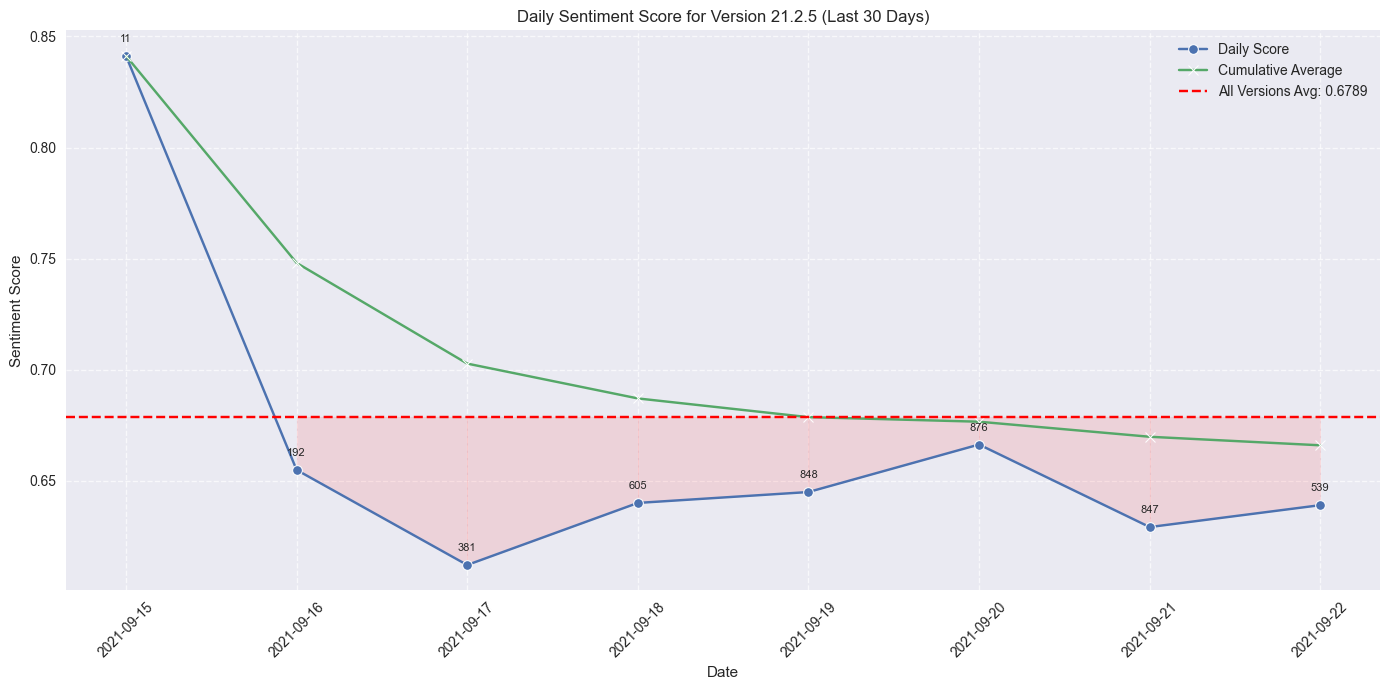

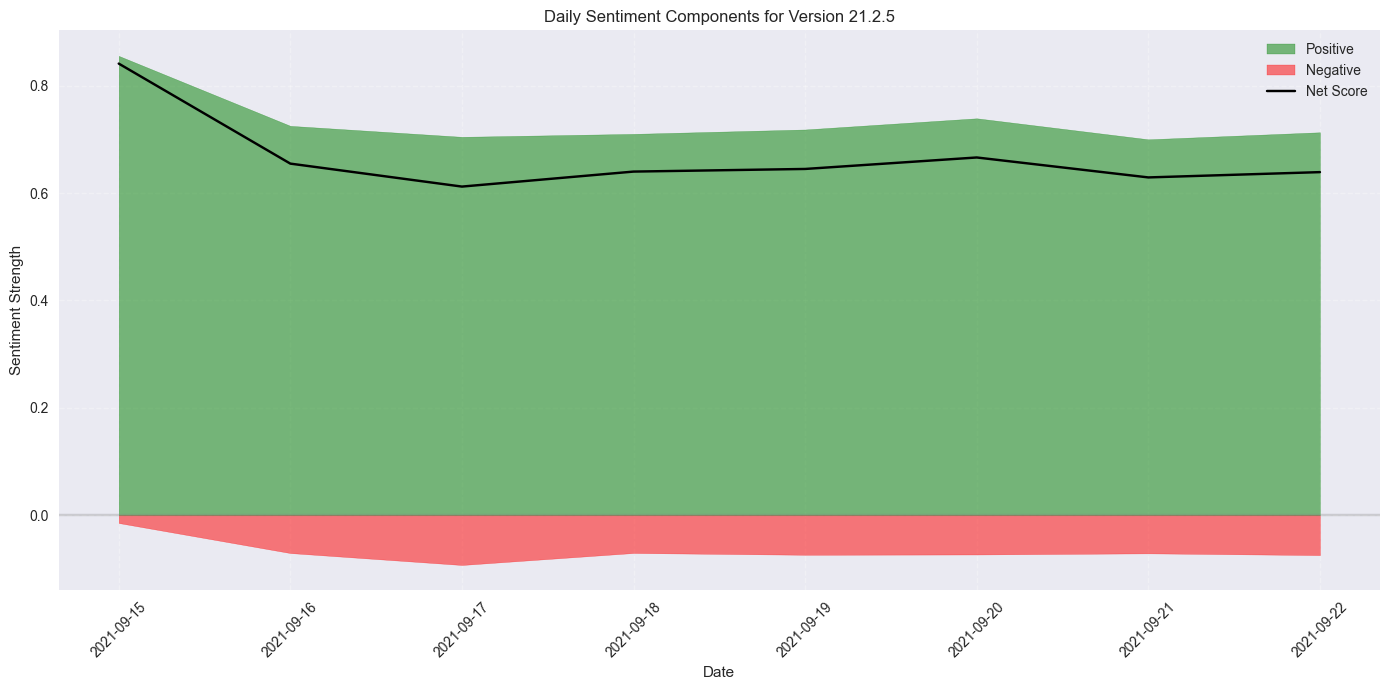

In [35]:
latest_version = recent_versions[0]
print(f"\nAnalyzing daily sentiment trend for latest version: {latest_version}")

# Filter for the latest version
latest_df = df[df['app_version'] == latest_version].copy()

# Get the last 30 days of data
last_date = latest_df['posted_date'].max()
start_date = last_date - timedelta(days=30)
latest_30days = latest_df[(latest_df['posted_date'] >= start_date) & (latest_df['posted_date'] <= last_date)]

# If we have few reviews, extend the period
if len(latest_30days) < 100:
    print(f"Warning: Only {len(latest_30days)} reviews found in the last 30 days. Extending period...")
    start_date = last_date - timedelta(days=90)  # Try 90 days
    latest_30days = latest_df[(latest_df['posted_date'] >= start_date) & (latest_df['posted_date'] <= last_date)]

print(f"Analyzing {len(latest_30days)} reviews from {start_date.date()} to {last_date.date()}")

# Apply sentiment analysis to these reviews (same process as before)
print("Computing sentiment for latest version reviews...")
latest_30days['sentiment_scores'] = None
batch_size = 10

for i in range(0, len(latest_30days), batch_size):
    end_idx = min(i + batch_size, len(latest_30days))
    print(f"Processing batch {i//batch_size + 1}/{(len(latest_30days) + batch_size - 1)//batch_size}")
    batch = latest_30days.iloc[i:end_idx]

    # Process each review individually
    batch_sentiments = []
    for text in batch['review_text']:
        sentiment = get_sentiment(str(text))
        batch_sentiments.append(sentiment)

    # Safely assign results back
    for j, sentiment in enumerate(batch_sentiments):
        if i + j < len(latest_30days):
            latest_30days.at[latest_30days.index[i + j], 'sentiment_scores'] = sentiment

# Extract sentiment scores
latest_30days['negative_score'] = latest_30days['sentiment_scores'].apply(lambda x: x['negative'] if x else 0.33)
latest_30days['neutral_score'] = latest_30days['sentiment_scores'].apply(lambda x: x['neutral'] if x else 0.34)
latest_30days['positive_score'] = latest_30days['sentiment_scores'].apply(lambda x: x['positive'] if x else 0.33)

# Handle NaN in upvotes
latest_30days['upvotes'] = latest_30days['upvotes'].fillna(0)

# Normalize upvotes
min_upvotes = latest_30days['upvotes'].min()
max_upvotes = latest_30days['upvotes'].max()
if max_upvotes > min_upvotes:
    latest_30days['normalized_upvotes'] = (latest_30days['upvotes'] - min_upvotes) / (max_upvotes - min_upvotes)
else:
    latest_30days['normalized_upvotes'] = 0

# Calculate weighted sentiment
latest_30days['sentiment_score'] = (latest_30days['positive_score'] - latest_30days['negative_score']) * \
                                  (1 + UPVOTE_WEIGHT * latest_30days['normalized_upvotes'])

# Group by day and calculate daily sentiment
latest_30days['date'] = latest_30days['posted_date'].dt.date
daily_sentiment = latest_30days.groupby('date').agg({
    'sentiment_score': 'mean',
    'positive_score': 'mean',
    'negative_score': 'mean',
    'review_id': 'count'
}).reset_index()

# Calculate cumulative average
daily_sentiment['cumulative_avg'] = daily_sentiment['sentiment_score'].expanding().mean()

# Plot the daily sentiment trend with cumulative average
plt.figure(figsize=(14, 7))
# Create line plot with markers
ax = sns.lineplot(x='date', y='sentiment_score', data=daily_sentiment, marker='o', label='Daily Score')
# Add cumulative average line
sns.lineplot(x='date', y='cumulative_avg', data=daily_sentiment, marker='x', label='Cumulative Average')
# Add overall average reference line
plt.axhline(y=avg_score, color='r', linestyle='--', label=f'All Versions Avg: {avg_score:.4f}')

# Create a colormap to shade areas above/below the average
for i in range(len(daily_sentiment)-1):
    # Get coordinates for the area between points
    x0, y0 = daily_sentiment['date'].iloc[i], daily_sentiment['sentiment_score'].iloc[i]
    x1, y1 = daily_sentiment['date'].iloc[i+1], daily_sentiment['sentiment_score'].iloc[i+1]

    if y0 > avg_score and y1 > avg_score:
        # Both points above average - shade green
        plt.fill_between([x0, x1], [y0, y1], avg_score, alpha=0.1, color='green')
    elif y0 < avg_score and y1 < avg_score:
        # Both points below average - shade red
        plt.fill_between([x0, x1], [y0, y1], avg_score, alpha=0.1, color='red')

# Add review count as annotations
for i, row in daily_sentiment.iterrows():
    plt.annotate(f"{int(row['review_id'])}",
                (row['date'], row['sentiment_score']),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                fontsize=8)

plt.title(f'Daily Sentiment Score for Version {latest_version} (Last {(last_date-start_date).days} Days)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('daily_sentiment_trend.png')

# Create a cumulative area chart for daily sentiment components
plt.figure(figsize=(14, 7))
# Prepare the data
daily_sentiment_stacked = daily_sentiment.copy()
# Calculate the positive area (above zero)
daily_sentiment_stacked['positive_area'] = daily_sentiment_stacked['positive_score']
# Calculate the negative area (below zero)
daily_sentiment_stacked['negative_area'] = daily_sentiment_stacked['negative_score']

# Create a stacked area chart
plt.fill_between(daily_sentiment_stacked['date'], 0, daily_sentiment_stacked['positive_score'], alpha=0.5, color='green', label='Positive')
plt.fill_between(daily_sentiment_stacked['date'], 0, -daily_sentiment_stacked['negative_score'], alpha=0.5, color='red', label='Negative')

# Add the score line on top
plt.plot(daily_sentiment_stacked['date'], daily_sentiment_stacked['sentiment_score'], 'k-', label='Net Score')
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

plt.title(f'Daily Sentiment Components for Version {latest_version}')
plt.xlabel('Date')
plt.ylabel('Sentiment Strength')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('daily_sentiment_components.png')

print("Analysis complete. All plots have been saved.")

# Part C - Identifying Performance and UI issues faced by users

In [2]:
!pip install transformers torch
!pip install accelerate>=0.26.0


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re
from collections import Counter
import torch
import warnings
warnings.filterwarnings('ignore')

# Import Hugging Face transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

# Function to analyze issues for a specific app version
def analyze_app_issues(df, version=None, max_reviews=2000):
    """
    Analyze app reviews for Performance and UI issues for a specific version.

    Parameters:
    - df: DataFrame containing app reviews
    - version: App version to analyze (default: latest version)
    - max_reviews: Maximum number of reviews to analyze per category (default: 2000)

    Returns:
    - Dictionary with analysis results
    """
    # Load Llama 3.2 3B model and tokenizer (do this once outside the function for efficiency)
    print("Loading Llama 3.2 3B model...")
    try:
        tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-3B-Instruct")
        model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-3B-Instruct",
                                                     torch_dtype=torch.float16,  # Use half precision to save memory
                                                     device_map="auto")  # Automatically use GPU if available
        print("Model loaded successfully")
    except Exception as e:
        print(f"Error loading model: {e}")
        raise

    # Clean up data
    df = df.dropna(subset=['app_version', 'review_text'])

    # If version not specified, use the latest version
    if version is None:
        if 'posted_date' in df.columns:
            df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')
            latest_date = df.dropna(subset=['posted_date'])['posted_date'].max()
            latest_version_reviews = df[df['posted_date'] == latest_date]
            if len(latest_version_reviews) > 0:
                version = latest_version_reviews['app_version'].mode()[0]
            else:
                version = df['app_version'].mode()[0]  # Most common version as fallback
        else:
            version = df['app_version'].mode()[0]  # Most common version

    print(f"Analyzing issues for app version: {version}")

    # Filter reviews for the specified version
    version_reviews = df[df['app_version'] == version].copy()
    print(f"Found {len(version_reviews)} reviews for version {version}")

    if len(version_reviews) == 0:
        return {"error": f"No reviews found for version {version}"}

    # Handle NaN upvotes
    version_reviews['upvotes'] = version_reviews['upvotes'].fillna(0)

    # Define keywords for categorization
    performance_keywords = [
        'slow', 'crash', 'freeze', 'lag', 'battery', 'drain', 'performance',
        'loading', 'stuck', 'hang', 'memory', 'speed', 'fast', 'responsive',
        'unresponsive', 'buggy', 'error', 'restart', 'boot', 'shutdown',
        'server', 'connection', 'network', 'offline', 'glitch'
    ]

    ui_keywords = [
        'interface', 'ui', 'button', 'screen', 'display', 'layout', 'design',
        'font', 'text', 'menu', 'navigation', 'scroll', 'swipe', 'tap',
        'click', 'touch', 'color', 'theme', 'dark mode', 'light mode',
        'icon', 'image', 'graphic', 'animation', 'transition', 'visual'
    ]

    # Create regex patterns for faster matching
    performance_pattern = re.compile(r'\b(' + '|'.join(performance_keywords) + r')\b', re.IGNORECASE)
    ui_pattern = re.compile(r'\b(' + '|'.join(ui_keywords) + r')\b', re.IGNORECASE)

    # Categorize reviews
    version_reviews['has_performance_issue'] = version_reviews['review_text'].apply(
        lambda x: bool(performance_pattern.search(str(x))) if isinstance(x, str) else False
    )

    version_reviews['has_ui_issue'] = version_reviews['review_text'].apply(
        lambda x: bool(ui_pattern.search(str(x))) if isinstance(x, str) else False
    )

    # Filter reviews by category
    performance_reviews = version_reviews[version_reviews['has_performance_issue']].copy()
    ui_reviews = version_reviews[version_reviews['has_ui_issue']].copy()

    print(f"Found {len(performance_reviews)} reviews mentioning performance issues")
    print(f"Found {len(ui_reviews)} reviews mentioning UI issues")

    # Calculate issue severity (based on upvotes)
    for df_category in [performance_reviews, ui_reviews]:
        if len(df_category) > 0:
            # Normalize upvotes
            min_upvotes = df_category['upvotes'].min()
            max_upvotes = df_category['upvotes'].max()

            if max_upvotes > min_upvotes:
                df_category['upvote_weight'] = 1 + (df_category['upvotes'] - min_upvotes) / (max_upvotes - min_upvotes)
            else:
                df_category['upvote_weight'] = 1

    # Prepare data for Llama summarization
    results = {}

    # Function to generate text with Llama
    def generate_llama_response(prompt, max_new_tokens=800):
        try:
            # Format the prompt for the instruct model
            messages = [
                {"role": "system", "content": "You are a helpful assistant that analyzes app reviews and summarizes key issues."},
                {"role": "user", "content": prompt}
            ]
            prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

            # Tokenize the prompt
            inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

            # Generate the response
            outputs = model.generate(
                input_ids=inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_new_tokens=max_new_tokens,
                temperature=0.1,  # Low temperature for more focused output
                top_p=0.9,
                do_sample=True,
                pad_token_id=tokenizer.eos_token_id
            )

            # Decode the response
            response = tokenizer.decode(outputs[0][inputs["input_ids"].shape[1]:], skip_special_tokens=True)

            return response.strip()

        except Exception as e:
            print(f"Error generating response: {e}")
            return f"Error generating response: {str(e)}"

    # Function to summarize reviews using Llama
    def summarize_with_llama(reviews_df, category_name):
        if len(reviews_df) == 0:
            return {
                "summary": f"No {category_name} issues found for version {version}",
                "raw_reviews": [],
                "total_reviews": 0
            }

        # Limit to max_reviews for processing efficiency
        if len(reviews_df) > max_reviews:
            # Sort by upvote_weight to prioritize reviews with more upvotes
            reviews_sample = reviews_df.sort_values('upvote_weight', ascending=False).head(max_reviews)
        else:
            reviews_sample = reviews_df

        # Prepare reviews text for Llama - limit to avoid token overflow
        # For large datasets, sample or summarize the reviews
        if len(reviews_sample) > 100:
            # Use more reviews for high upvotes, and sample the rest
            high_upvote_reviews = reviews_sample.sort_values('upvotes', ascending=False).head(50)
            other_reviews = reviews_sample[~reviews_sample.index.isin(high_upvote_reviews.index)]
            other_reviews_sample = other_reviews.sample(min(50, len(other_reviews)), random_state=42)
            reviews_to_analyze = pd.concat([high_upvote_reviews, other_reviews_sample])
        else:
            reviews_to_analyze = reviews_sample

        # Format reviews for prompt
        review_texts = []
        for _, row in reviews_to_analyze.iterrows():
            review_text = str(row['review_text'])
            upvotes = int(row['upvotes']) if pd.notna(row['upvotes']) else 0
            review_texts.append(f"Review (Upvotes: {upvotes}): {review_text}")

        # Join review texts with separators, limiting length to avoid exceeding token limits
        # Roughly limiting to ~4000 tokens worth of text
        reviews_content = "\n\n".join(review_texts)
        if len(reviews_content) > 16000:  # Roughly 4000 tokens
            reviews_content = reviews_content[:16000] + "...\n[additional reviews omitted for length]"

        # Prepare prompt for Llama
        prompt = f"""
        I have user reviews for version {version} of an app that mention {category_name.lower()} issues.

        Please analyze these reviews and summarize the main {category_name.lower()} issues in bullet point format.
        For each issue:
        1. Provide a clear title
        2. Include the count of mentions
        3. Rate severity based on frequency and upvotes (High/Medium/Low)
        4. Sort by severity (highest first)

        Here are some of the reviews (representing {len(reviews_to_analyze)} out of {len(reviews_sample)} total reviews in this category):

        {reviews_content}

        Summary of {category_name} Issues:
        """

        # Generate summary using Llama
        try:
            summary = generate_llama_response(prompt)
        except Exception as e:
            print(f"Error summarizing with Llama: {e}")
            # Fallback to simpler analysis
            summary = create_fallback_summary(reviews_sample, category_name, performance_keywords, ui_keywords)

        return {
            "summary": summary,
            "raw_reviews": reviews_sample['review_text'].tolist(),
            "total_reviews": len(reviews_df)
        }

    # Create a simpler fallback summary if Llama fails
    def create_fallback_summary(reviews_df, category_name, performance_keywords, ui_keywords):
        keywords = performance_keywords if category_name == "Performance" else ui_keywords
        word_counts = Counter()

        for text in reviews_df['review_text']:
            if isinstance(text, str):
                for word in keywords:
                    if re.search(r'\b' + word + r'\b', text.lower()):
                        word_counts[word] += 1

        summary = f"### {category_name} Issues Summary for Version {version}\n\n"

        for i, (word, count) in enumerate(word_counts.most_common(10)):
            severity = "High" if count > len(reviews_df) * 0.3 else "Medium" if count > len(reviews_df) * 0.1 else "Low"
            summary += f"• **{word.capitalize()} issues**: Mentioned in {count} reviews (Severity: {severity})\n"

        return summary

    # Generate summaries
    print("Analyzing performance issues...")
    results["performance"] = summarize_with_llama(performance_reviews, "Performance")

    print("Analyzing UI issues...")
    results["ui"] = summarize_with_llama(ui_reviews, "UI")

    # Analyze issue trends over time (last 30 days)
    if 'posted_date' in version_reviews.columns:
        try:
            latest_date = version_reviews['posted_date'].max()
            start_date = latest_date - timedelta(days=30)

            # Filter for last 30 days
            recent_reviews = version_reviews[(version_reviews['posted_date'] >= start_date)]

            # Group by day
            recent_reviews['date'] = recent_reviews['posted_date'].dt.date
            daily_performance = recent_reviews.groupby('date')['has_performance_issue'].sum().reset_index()
            daily_ui = recent_reviews.groupby('date')['has_ui_issue'].sum().reset_index()

            # Calculate benchmarks (average issues per day in the reviews)
            perf_benchmark = performance_reviews.shape[0] / 30  # Simplistic benchmark
            ui_benchmark = ui_reviews.shape[0] / 30  # Simplistic benchmark

            # Create time series plot
            plt.figure(figsize=(14, 7))

            # Plot performance issues
            plt.plot(daily_performance['date'], daily_performance['has_performance_issue'],
                    'b-', label='Performance Issues')
            plt.axhline(y=perf_benchmark, color='b', linestyle='--',
                       label=f'Avg Performance Issues ({perf_benchmark:.1f}/day)')

            # Plot UI issues
            plt.plot(daily_ui['date'], daily_ui['has_ui_issue'],
                    'r-', label='UI Issues')
            plt.axhline(y=ui_benchmark, color='r', linestyle='--',
                       label=f'Avg UI Issues ({ui_benchmark:.1f}/day)')

            plt.title(f'Daily Issue Counts for Version {version} (Last 30 Days)')
            plt.xlabel('Date')
            plt.ylabel('Number of Issues Mentioned')
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.xticks(rotation=45)
            plt.tight_layout()

            # Save plot
            plt.savefig(f'version_{version}_issue_trends.png')
            results["trend_chart_path"] = f'version_{version}_issue_trends.png'

            # Store trend data
            results["trend_data"] = {
                "performance": daily_performance.to_dict('records'),
                "ui": daily_ui.to_dict('records'),
                "benchmarks": {
                    "performance": perf_benchmark,
                    "ui": ui_benchmark
                }
            }
        except Exception as e:
            results["trend_error"] = f"Error generating trend analysis: {str(e)}"
            print(f"Error in trend analysis: {e}")

    return results


Loading Llama 3.2 3B model...


Loading checkpoint shards: 100%|██████████| 2/2 [00:06<00:00,  3.08s/it]
Some parameters are on the meta device because they were offloaded to the cpu.


Model loaded successfully
Analyzing issues for app version: 21.2.5
Found 4298 reviews for version 21.2.5
Found 27 reviews mentioning performance issues
Found 10 reviews mentioning UI issues
Analyzing performance issues...
Analyzing UI issues...
PERFORMANCE ISSUES:
After analyzing the reviews, I've identified the main performance issues with version 21.2.5 of the app. Here are the performance issues in bullet point format, sorted by severity:

* **High Severity (5+ upvotes)**
	+ Server Error (4 mentions)
		- Severity: High
		- Count: 4
		- Description: Users are experiencing server errors when trying to sign up, login, or access certain features.
* **Medium Severity (2-4 upvotes)**
	+ Slow Performance (4 mentions)
		- Severity: Medium
		- Count: 4
		- Description: Users are experiencing slow loading times, freezing, and lag when using the app.
	+ Video Loading Issues (3 mentions)
		- Severity: Medium
		- Count: 3
		- Description: Users are experiencing issues with video loading, includi

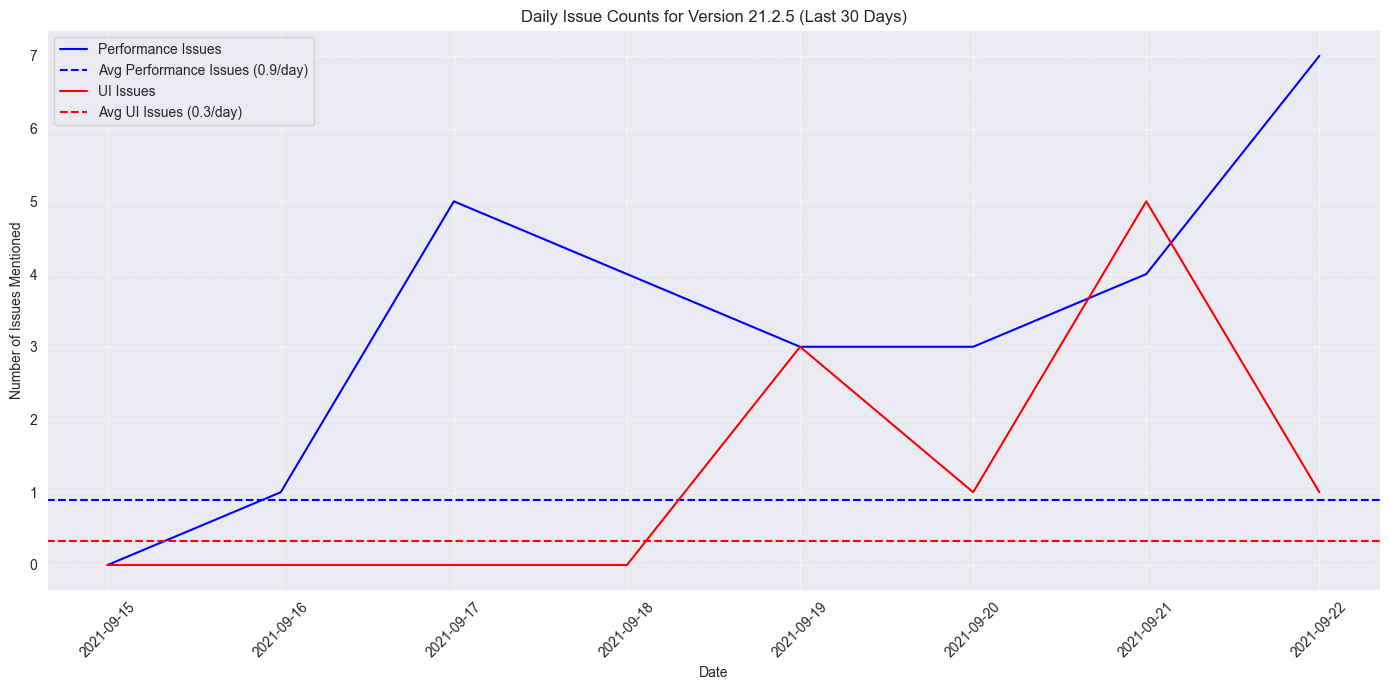

In [3]:
import accelerate
result = analyze_app_issues(df)  # For latest version

# Print the summaries
print("PERFORMANCE ISSUES:")
print(result["performance"]["summary"])
print("\nUI ISSUES:")
print(result["ui"]["summary"])